#  Yelp Rating Prediction 

In [70]:
import numpy as np
import pandas as pd

In [71]:
yelp_train = pd.read_csv("yelp_train.csv")
yelp_test = pd.read_csv("yelp_test.csv")
yelp_train.info()
yelp_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       6272 non-null   float64
 1   review_count                6272 non-null   int64  
 2   GoodForKids                 6272 non-null   object 
 3   Alcohol                     6272 non-null   object 
 4   BusinessAcceptsCreditCards  6272 non-null   object 
 5   WiFi                        6272 non-null   object 
 6   BikeParking                 6272 non-null   object 
 7   ByAppointmentOnly           6272 non-null   object 
 8   WheelechairAccessible       6272 non-null   object 
 9   OutdoorSeating              6272 non-null   object 
 10  RestaurantsReservations     6272 non-null   object 
 11  DogsAllowed                 6272 non-null   object 
 12  Caters                      6272 non-null   object 
dtypes: float64(1), int64(1), object(1

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,3.5,26,(Missing),(Missing),TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)
1,3.0,40,TRUE,'full_bar',TRUE,'free',FALSE,(Missing),(Missing),TRUE,FALSE,(Missing),(Missing)
2,4.5,45,TRUE,'full_bar',TRUE,'free',FALSE,(Missing),(Missing),TRUE,FALSE,(Missing),(Missing)
3,4.5,61,TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),FALSE
4,3.5,5,TRUE,'beer_and_wine',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),(Missing)


# 
In this case, treating missing values as seperate category seems to be a reasonable choice. Since few attributes contain high percentage of missing values, it would be recommended to treat missing values as seperate category rather than removing them since removal of missing values leads to huge loss of data.

In [12]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [13]:
yelp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       6272 non-null   float64
 1   review_count                6272 non-null   int64  
 2   GoodForKids                 6272 non-null   object 
 3   Alcohol                     6272 non-null   object 
 4   BusinessAcceptsCreditCards  6272 non-null   object 
 5   WiFi                        6272 non-null   object 
 6   BikeParking                 6272 non-null   object 
 7   ByAppointmentOnly           6272 non-null   object 
 8   WheelechairAccessible       6272 non-null   object 
 9   OutdoorSeating              6272 non-null   object 
 10  RestaurantsReservations     6272 non-null   object 
 11  DogsAllowed                 6272 non-null   object 
 12  Caters                      6272 non-null   object 
dtypes: float64(1), int64(1), object(1

In [14]:
yelp_train_enc = pd.get_dummies(yelp_train, columns = ['GoodForKids','Alcohol','BusinessAcceptsCreditCards','WiFi','BikeParking','ByAppointmentOnly','WheelechairAccessible','OutdoorSeating','RestaurantsReservations','DogsAllowed','Caters'])
yelp_test_enc = pd.get_dummies(yelp_test, columns = ['GoodForKids','Alcohol','BusinessAcceptsCreditCards','WiFi','BikeParking','ByAppointmentOnly','WheelechairAccessible','OutdoorSeating','RestaurantsReservations','DogsAllowed','Caters'])

In [15]:
yelp_train_enc.head()

,stars,review_count,GoodForKids_(Missing),GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),BusinessAcceptsCreditCards_(Missing),...,OutdoorSeating_TRUE,RestaurantsReservations_(Missing),RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_(Missing),DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_(Missing),Caters_FALSE,Caters_TRUE
0,3.5,26,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,3.0,40,0,0,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
2,4.5,45,0,0,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
3,4.5,61,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,3.5,5,0,0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [16]:
# Performed One - Hot encoding to make modeling process easier
y_train_enc = yelp_train_enc['stars']
y_test_enc = yelp_test_enc['stars']
x_train_enc = yelp_train_enc.drop(['stars'], axis = 1)
x_test_enc = yelp_test_enc.drop(['stars'], axis = 1)
x_train_enc

,review_count,GoodForKids_(Missing),GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),BusinessAcceptsCreditCards_(Missing),BusinessAcceptsCreditCards_FALSE,...,OutdoorSeating_TRUE,RestaurantsReservations_(Missing),RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_(Missing),DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_(Missing),Caters_FALSE,Caters_TRUE
0,26,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,40,0,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
2,45,0,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
3,61,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,5,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,132,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6268,27,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6269,149,1,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
6270,52,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


# Regression Models

# 1. Linear Regression Model



In [18]:

import statsmodels.formula.api as smf
linreg = smf.ols(formula='stars ~ review_count + C(GoodForKids, Treatment(reference="(Missing)")) + C(Alcohol, Treatment(reference="(Missing)")) + C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)")) + C(WiFi, Treatment(reference="(Missing)")) + C(BikeParking, Treatment(reference="(Missing)")) + C(ByAppointmentOnly, Treatment(reference="(Missing)")) + C(WheelechairAccessible, Treatment(reference="(Missing)")) + C(OutdoorSeating, Treatment(reference="(Missing)")) + C(RestaurantsReservations, Treatment(reference="(Missing)")) + C(DogsAllowed, Treatment(reference="(Missing)")) + C(Caters, Treatment(reference="(Missing)"))',data=yelp_train).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     47.80
Date:                Wed, 23 Jun 2021   Prob (F-statistic):          3.10e-215
Time:                        19:12:00   Log-Likelihood:                -7317.5
No. Observations:                6272   AIC:                         1.469e+04
Df Residuals:                    6246   BIC:                         1.486e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
y_train = yelp_train['stars']
y_test = yelp_test['stars']
x_train = yelp_train.drop(['stars'], axis = 1)
x_test = yelp_test.drop(['stars'], axis = 1)
y_pred_linreg = linreg.predict(x_test)
mean_absolute_error(y_test,y_pred_linreg)
print('OSR2_linreg:', OSR2(linreg, x_test, y_test, y_train))
print('MAE_linreg:', mean_absolute_error(y_test,y_pred_linreg))


OSR2_linreg: 0.1804151924120022
MAE_linreg: 0.6170871129206774


# 2. Regression Tree Model

In [20]:
#Choosing proper ccp_alpha to use
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
grid_values = {'ccp_alpha': np.linspace(0, 0.005, 101)}
dtr = DecisionTreeRegressor(min_samples_split=10, random_state=88)
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_cv.fit(x_train_enc, y_train_enc)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_split=10,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-0...
       3.00e-03, 3.05e-03, 3.10e-03, 3.15e-03, 3.20e-03, 3.25e-03,
       3.30e-03, 3.35e-03, 3.40e-03, 3.45e-03, 3.50e-03, 3.55e-03,
       3.60e-03, 3.65e-03, 3.70e-03, 3.75e-03, 3.80e-03, 3.85e-03,
       3.90e-03, 3.95e-03, 4.00e-03, 4.05e-03, 4.10e-03, 4.15e-03,
       4.20e-03, 4.25e-03, 4.30e-03, 4.35e-03, 4.40e-03, 4.45e-03,
       4.50e-03, 4.55e-03, 4.60e-03, 4.65e-03, 4.70e-03, 4.75e-03,
       4.80e-03, 4.85e-03, 4.90e-03, 4.95e-03, 5.00e-03])},
             scoring='r2')

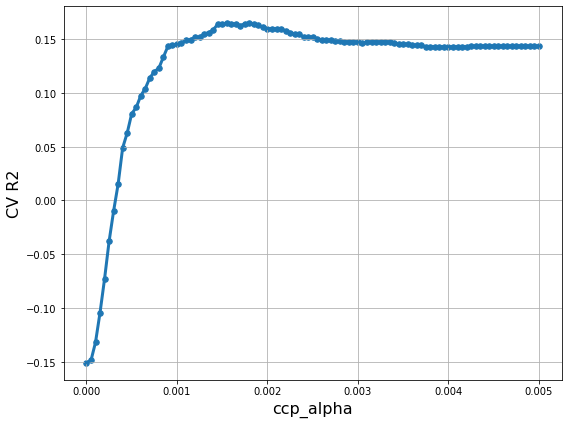

In [21]:
#Choosing proper ccp_alpha to use
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

In [22]:
#Best ccp_alpha value we got from above
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0015500000000000002}


Node count = 37


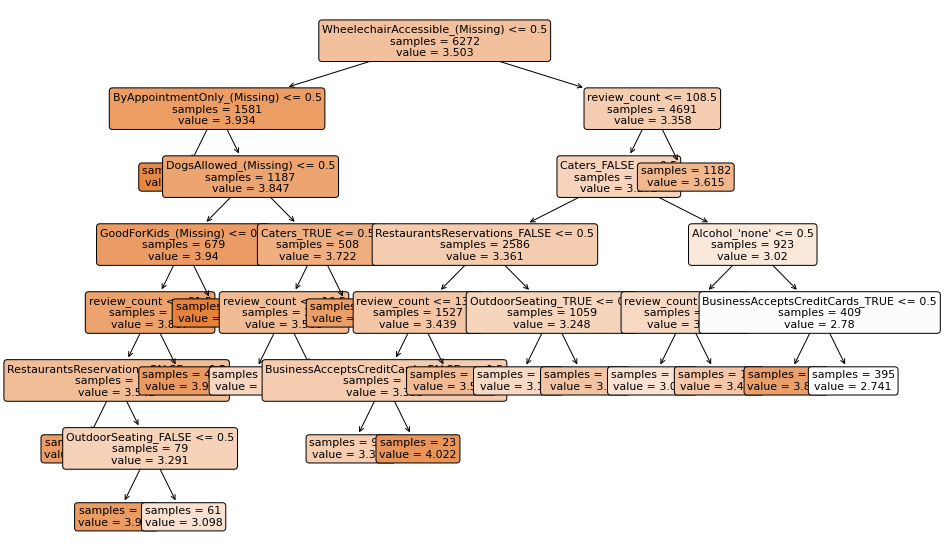

In [24]:
#Building a Regression Tree Model
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
dtr = DecisionTreeRegressor(min_samples_split=20, 
                            ccp_alpha=0.00155,
                            random_state = 88)
dtr = dtr.fit(x_train_enc, y_train_enc)
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(15,10))
plot_tree(dtr, 
          feature_names=x_train_enc.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=11)
plt.show()

# 3. Regression Model Performance Comparison

In [32]:
from sklearn.metrics import mean_absolute_error
y_pred_dtr = dtr.predict(x_test_enc)
print('OSR2 for dtr:', OSR2(dtr, x_test_enc, y_test_enc, y_train_enc))
print('MAE for dtr:',mean_absolute_error(y_test_enc,y_pred_dtr))

OSR2 for dtr: 0.17319613303561898
MAE for dtr: 0.614760452679948


In [33]:
y_pred_ligreg = linreg.predict(x_test)
mean_absolute_error(y_test,y_pred_ligreg)
print('OSR2 for linreg:', OSR2(linreg, x_test, y_test, y_train))
print('MAE for linreg:',mean_absolute_error(y_test,y_pred_ligreg))

OSR2 for linreg: 0.1804151924120022
MAE for linreg: 0.6170871129206774


#  Classification Models

In [34]:
# Added ['fourOrAbove'] column to training and test data which gives true if stars>=4
yelp_train['fourOrAbove'] = np.where(yelp_train['stars'] >= 4, 1, 0)
yelp_test['fourOrAbove'] = np.where(yelp_test['stars'] >= 4, 1, 0)
yelp_test.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,fourOrAbove
0,4.5,11,(Missing),(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),1
1,4.0,82,TRUE,'none',TRUE,'no',TRUE,(Missing),TRUE,FALSE,FALSE,(Missing),TRUE,1
2,5.0,3,(Missing),(Missing),TRUE,'no',TRUE,TRUE,TRUE,(Missing),(Missing),FALSE,(Missing),1
3,4.0,141,TRUE,'none',TRUE,'no',FALSE,(Missing),TRUE,FALSE,FALSE,(Missing),TRUE,1
4,5.0,222,TRUE,'none',TRUE,'free',TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,1


In [35]:
yelp_train.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,fourOrAbove
0,3.5,26,(Missing),(Missing),TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),0
1,3.0,40,TRUE,'full_bar',TRUE,'free',FALSE,(Missing),(Missing),TRUE,FALSE,(Missing),(Missing),0
2,4.5,45,TRUE,'full_bar',TRUE,'free',FALSE,(Missing),(Missing),TRUE,FALSE,(Missing),(Missing),1
3,4.5,61,TRUE,(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),FALSE,1
4,3.5,5,TRUE,'beer_and_wine',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),(Missing),0


We can see from the value below counts that the number of business with ratings 4 or above
is almsot same as the number of business with ratings < 4. There is only a slight class imbalance between class 1 and 0 since thier counts are about the same(3531vs2741).
Therefore, accuracy seems to be a reasonable choice to use as the evaluation metric.

In [36]:
yelp_train['fourOrAbove'].value_counts()

0    3531
1    2741
Name: fourOrAbove, dtype: int64

In [37]:
#Q2-d-ii Changed star rating predictions into fourOrAbove by thresholding.
y_pred_binary_linreg = np.where(y_pred_linreg >= 4,1,0)
y_pred_binary_dtr = np.where(y_pred_dtr >= 4,1,0)
y_pred_binary_dtr[40:50]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

# 1. Logistic Regression Model

In [38]:
#Built a Logistic Regression Model-- treated (Missing) as the reference level.
import statsmodels.formula.api as smf
logreg = smf.logit(formula='fourOrAbove ~ review_count + C(GoodForKids, Treatment(reference="(Missing)")) + C(Alcohol, Treatment(reference="(Missing)")) + C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)")) + C(WiFi, Treatment(reference="(Missing)")) + C(BikeParking, Treatment(reference="(Missing)")) + C(ByAppointmentOnly, Treatment(reference="(Missing)")) + C(WheelechairAccessible, Treatment(reference="(Missing)")) + C(OutdoorSeating, Treatment(reference="(Missing)")) + C(RestaurantsReservations, Treatment(reference="(Missing)")) + C(DogsAllowed, Treatment(reference="(Missing)")) + C(Caters, Treatment(reference="(Missing)"))',data=yelp_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.608938
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Wed, 23 Jun 2021   Pseudo R-squ.:                  0.1113
Time:                        19:19:06   Log-Likelihood:                -3819.3
converged:                       True   LL-Null:                       -4297.5
Covariance Type:            nonrobust   LLR p-value:                9.494e-186
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------

In [39]:
yelp_train_enc = pd.get_dummies(yelp_train, columns = ['GoodForKids','Alcohol','BusinessAcceptsCreditCards','WiFi','BikeParking','ByAppointmentOnly','WheelechairAccessible','OutdoorSeating','RestaurantsReservations','DogsAllowed','Caters'])
yelp_test_enc = pd.get_dummies(yelp_test, columns = ['GoodForKids','Alcohol','BusinessAcceptsCreditCards','WiFi','BikeParking','ByAppointmentOnly','WheelechairAccessible','OutdoorSeating','RestaurantsReservations','DogsAllowed','Caters'])
yelp_train_enc['fourOrAbove'] = np.where(yelp_train_enc['stars'] >= 4, 1, 0)
yelp_test_enc['fourOrAbove'] = np.where(yelp_test_enc['stars'] >= 4, 1, 0)
yelp_train_enc = yelp_train_enc.drop(['stars'], axis = 1)
yelp_test_enc = yelp_test_enc.drop(['stars',], axis = 1)                                         
y_train_enc2 = yelp_train_enc['fourOrAbove']
y_test_enc2 = yelp_test_enc['fourOrAbove']
x_train_enc2 = yelp_train_enc.drop(['fourOrAbove'], axis = 1)
x_test_enc2 = yelp_test_enc.drop(['fourOrAbove',], axis = 1)
y_test_enc2.head()

0    1
1    1
2    1
3    1
4    1
Name: fourOrAbove, dtype: int64

# 2. Classification Tree Model

Node count = 105


[Text(470.31428571428575, 498.3, 'WheelechairAccessible_(Missing) <= 0.5\nsamples = 6272\nvalue = [3531, 2741]\nclass = 0'),
 Text(143.4857142857143, 407.70000000000005, 'ByAppointmentOnly_(Missing) <= 0.5\nsamples = 1581\nvalue = [498, 1083]\nclass = 1'),
 Text(111.6, 317.1, 'samples = 394\nvalue = [57, 337]\nclass = 1'),
 Text(175.37142857142857, 317.1, 'DogsAllowed_(Missing) <= 0.5\nsamples = 1187\nvalue = [441, 746]\nclass = 1'),
 Text(95.65714285714286, 226.5, 'GoodForKids_(Missing) <= 0.5\nsamples = 679\nvalue = [213, 466]\nclass = 1'),
 Text(63.77142857142857, 135.89999999999998, 'review_count <= 81.5\nsamples = 556\nvalue = [190, 366]\nclass = 1'),
 Text(31.885714285714286, 45.299999999999955, '\n  (...)  \n'),
 Text(95.65714285714286, 45.299999999999955, '\n  (...)  \n'),
 Text(127.54285714285714, 135.89999999999998, 'samples = 123\nvalue = [23, 100]\nclass = 1'),
 Text(255.0857142857143, 226.5, "WiFi_'free' <= 0.5\nsamples = 508\nvalue = [228, 280]\nclass = 1"),
 Text(191.314

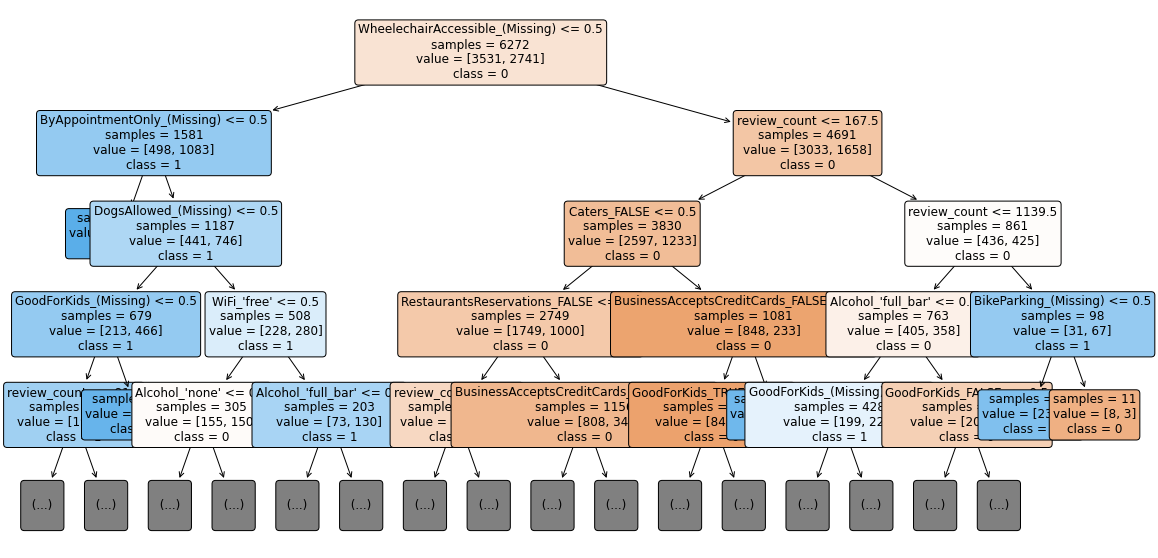

In [40]:
#Finding optimal ccp_alpha value for our model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
grid_values = {'ccp_alpha': np.linspace(0, 0.001,101)} 
dtc = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=20, random_state=88)
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtc_cv.fit(x_train_enc2, y_train_enc2)   

acc = dtc_cv.cv_results_['mean_test_score']
ccp = dtc_cv.cv_results_['param_ccp_alpha'].data
print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(20,10))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=x_train_enc2.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
          max_depth=4)

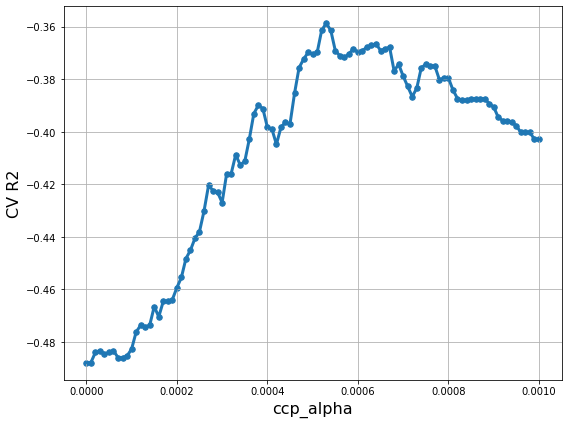

In [41]:
#Choosing ideal ccp_alpha value through Cross Validation.
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

In [42]:
print('Best ccp_alpha', dtc_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0005300000000000001}


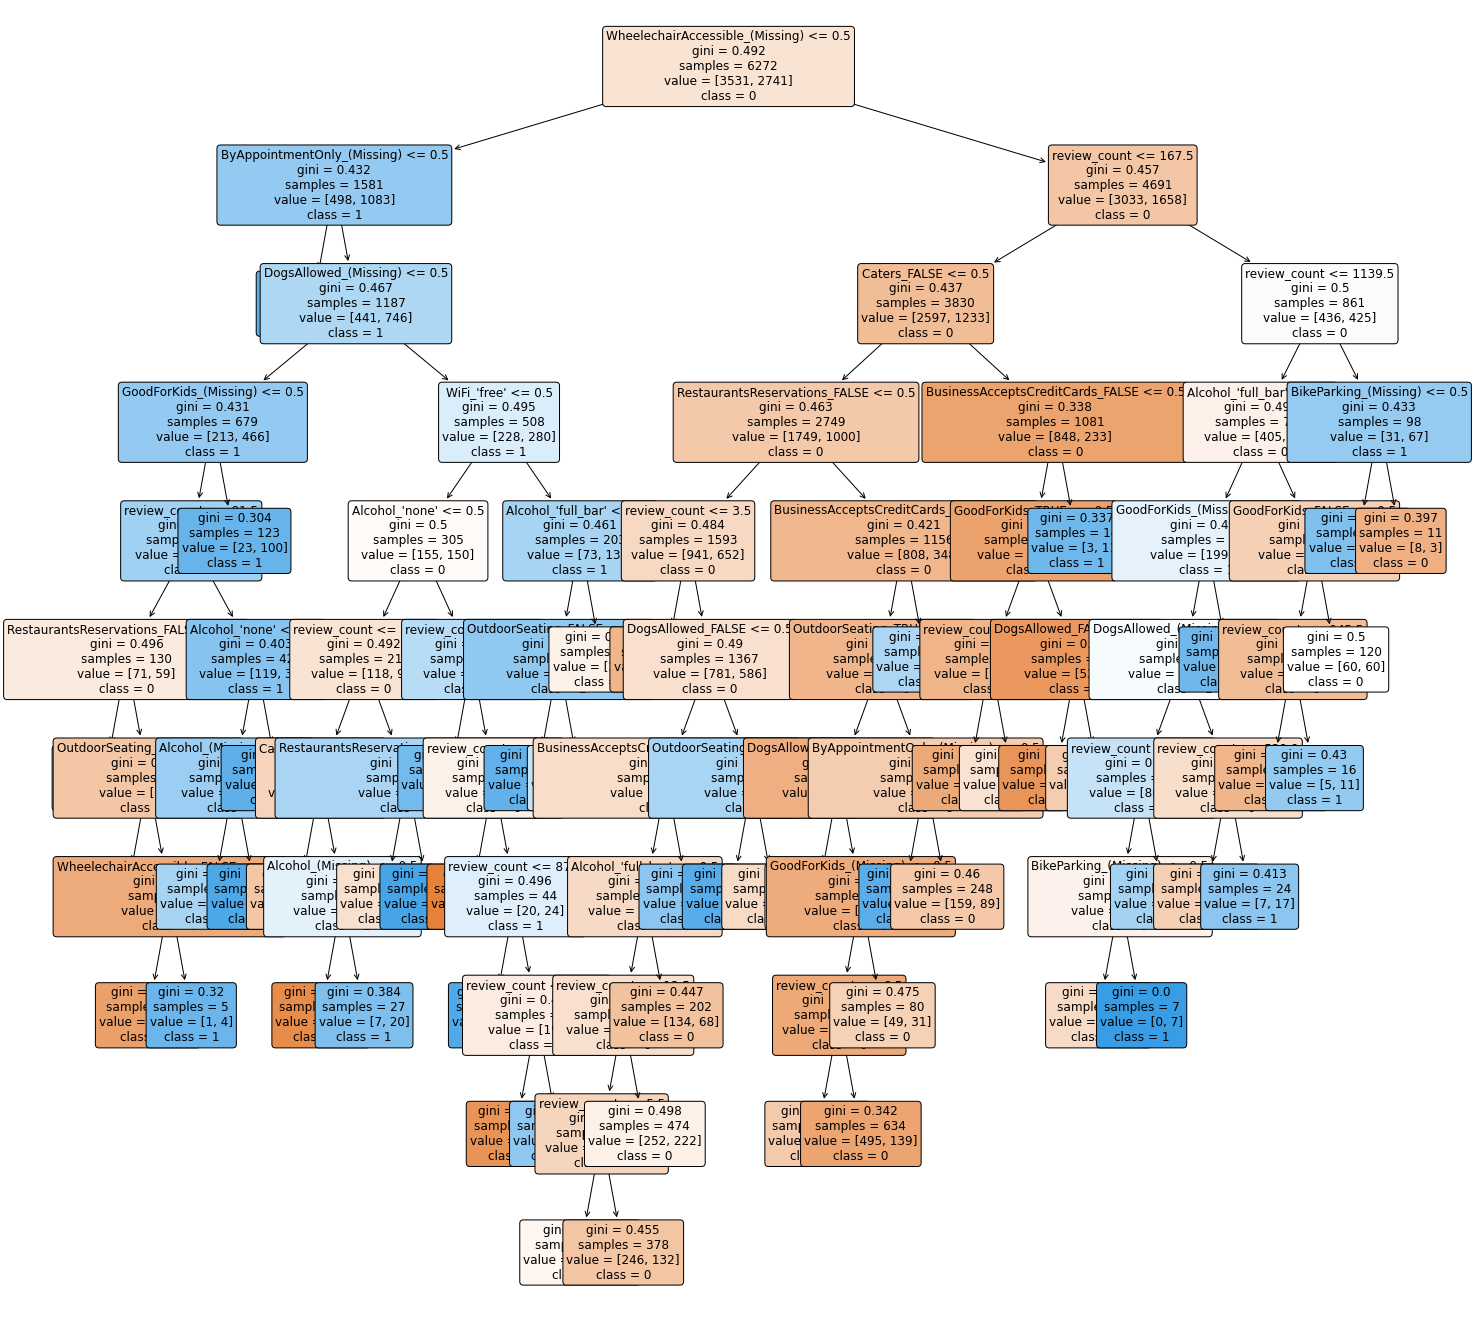

In [43]:
#Building a classification tree model based on best ccp_alpha chosen above, which is 0.00053. 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             
                             min_samples_split= 20,
                             ccp_alpha=0.00053,
                             random_state = 88)
dtc = dtc.fit(x_train_enc2, y_train_enc2)
plt.figure(figsize=(24,24))
plot_tree(dtc, 
          feature_names=x_train_enc2.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) 
plt.show()

In [44]:
#Used all 36 features as max_features for 'Vanilla' bagging
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=36, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
rf.fit(x_train_enc2, y_train_enc2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.4s finished


RandomForestClassifier(max_features=36, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=2)

In [45]:
#Used all 36 features as max_features for 'Vanilla' bagging
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
y_pred_rf = rf.predict(x_test_enc2)
cm = confusion_matrix(y_test_enc2, y_pred_rf)
cm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


array([[1151,  324],
       [ 559,  654]])

# 3. Random Forest Model

In [46]:
#Finding Optimal max_features value by performing Cross Validation for all possible max_features value(1-36).
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
import time

grid_values = {'max_features': np.linspace(1,36,36, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf2 = RandomForestClassifier() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(x_train_enc2, y_train_enc2)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=2, min_samples_leaf=5, n_

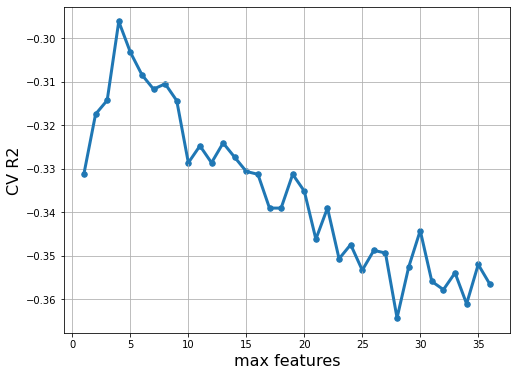

In [48]:
#Shows which max_features value gives the best cv R^2 value.
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')

In [49]:
print(rf_cv.best_params_)

{'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [50]:
#Building a Random Forest Classifier Using max_features acquired above, which is 4.

rf3 = RandomForestClassifier(max_features=4, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)

rf3.fit(x_train_enc2, y_train_enc2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished


RandomForestClassifier(max_features=4, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=2)

# 4. Classification Model Performance Comparison

In [51]:
y_test_enc2

0       1
1       1
2       1
3       1
4       1
       ..
2683    0
2684    1
2685    1
2686    1
2687    1
Name: fourOrAbove, Length: 2688, dtype: int64

In [52]:
default_false = np.sum(y_test_enc2 == 0)
default_true = np.sum(y_test_enc2 == 1)

print(pd.Series({'0': default_false, '1': default_true}))

0    1475
1    1213
dtype: int64


In [53]:
#Accuracy, True Positive Rate, and False Positive Rate for Baseline Model
ACC_baseline = default_false/(default_false + default_true)
TPR_baseline = 0
FPR_baseline = 0
print("ACC_baseline:",ACC_baseline)
print("TPR_baseline:",TPR_baseline)
print("FPR_baseline:",FPR_baseline)

ACC_baseline: 0.5487351190476191
TPR_baseline: 0
FPR_baseline: 0


In [54]:
#Confusion Matrix for Linear regression model
cm1 = confusion_matrix(y_test_enc2, y_pred_binary_linreg)
cm1

array([[1412,   63],
       [ 981,  232]])

In [55]:
#Accuracy, True Positive Rate, and False Positive Rate for Linear regression model 
ACC_linreg = (cm1.ravel()[0]+cm1.ravel()[3])/sum(cm1.ravel())
TPR_linreg = (cm1.ravel()[3])/(cm1.ravel()[3]+cm1.ravel()[2])
FPR_linreg = (cm1.ravel()[1])/(cm1.ravel()[1]+cm1.ravel()[0])
print("ACC_linreg:",ACC_linreg)
print("TPR_linreg:",TPR_linreg)
print("FPR_linreg:",FPR_linreg)

ACC_linreg: 0.6116071428571429
TPR_linreg: 0.1912613355317395
FPR_linreg: 0.04271186440677966


In [56]:
#Confusion Matrix for regression tree model model 
cm2 = confusion_matrix(y_test_enc2, y_pred_binary_dtr)
cm2

array([[1423,   52],
       [1013,  200]])

In [57]:
#Accuracy, True Positive Rate, and False Positive Rate for regression tree model model 
ACC_dtr = (cm2.ravel()[0]+cm2.ravel()[3])/sum(cm2.ravel())
TPR_dtr = (cm2.ravel()[3])/(cm2.ravel()[3]+cm2.ravel()[2])
FPR_dtr = (cm2.ravel()[1])/(cm2.ravel()[1]+cm2.ravel()[0])
print("ACC_dtr:",ACC_dtr)
print("TPR_dtr:",TPR_dtr)
print("FPR_dtr:",FPR_dtr)

ACC_dtr: 0.6037946428571429
TPR_dtr: 0.16488046166529266
FPR_dtr: 0.03525423728813559


In [58]:
#Confusion Matrix for logistic regression model 
y_prob_logreg = logreg.predict(yelp_test)
y_pred_logreg = pd.Series([1 if x > 0.5 else 0 for x in y_prob_logreg], index=y_prob_logreg.index)
cm3 = confusion_matrix(y_test_enc2, y_pred_logreg)
cm3

array([[1212,  263],
       [ 609,  604]])

In [59]:
#Accuracy, True Positive Rate, and False Positive Rate for logistic regression model 
ACC_logreg = (cm3.ravel()[0]+cm3.ravel()[3])/sum(cm3.ravel())
TPR_logreg = (cm3.ravel()[3])/(cm3.ravel()[3]+cm3.ravel()[2])
FPR_logreg = (cm3.ravel()[1])/(cm3.ravel()[1]+cm3.ravel()[0])
print("ACC_logreg:",ACC_logreg)
print("TPR_logreg:",TPR_logreg)
print("FPR_logreg:",FPR_logreg)

ACC_logreg: 0.6755952380952381
TPR_logreg: 0.49793899422918386
FPR_logreg: 0.1783050847457627


In [60]:
#Confusion Matrix for Classification tree model 
y_pred_dtc = dtc.predict(x_test_enc2)
cm4 = confusion_matrix(y_test_enc2, y_pred_dtc)
cm4

array([[1275,  200],
       [ 682,  531]])

In [61]:
#Accuracy, True Positive Rate, and False Positive Rate for  Classification tree model 
ACC_dtc = (cm4.ravel()[0]+cm4.ravel()[3])/sum(cm4.ravel())
TPR_dtc = (cm4.ravel()[3])/(cm4.ravel()[3]+cm4.ravel()[2])
FPR_dtc = (cm4.ravel()[1])/(cm4.ravel()[1]+cm4.ravel()[0])
print("ACC_dtc:",ACC_dtc)
print("TPR_dtc:",TPR_dtc)
print("FPR_dtc:",FPR_dtc)

ACC_dtc: 0.671875
TPR_dtc: 0.437757625721352
FPR_dtc: 0.13559322033898305


In [62]:
#Confusion Matrix for Random Forest Classification model
y_pred_rf3 = rf3.predict(x_test_enc2)
cm6 = confusion_matrix(y_test_enc2, y_pred_rf3)
cm6

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


array([[1227,  248],
       [ 579,  634]])

In [63]:
#Accuracy, True Positive Rate, and False Positive Rate for Random Forest Classification model
ACC_rf2 = (cm6.ravel()[0]+cm6.ravel()[3])/sum(cm6.ravel())
TPR_rf2 = (cm6.ravel()[3])/(cm6.ravel()[3]+cm6.ravel()[2])
FPR_rf2 = (cm6.ravel()[1])/(cm6.ravel()[1]+cm6.ravel()[0])
print("ACC_rf2:",ACC_rf2)
print("TPR_rf2:",TPR_rf2)
print("FPR_rf2:",FPR_rf2)

ACC_rf2: 0.6923363095238095
TPR_rf2: 0.5226710634789777
FPR_rf2: 0.168135593220339


In [65]:
MODELS = ['Baseline','Linear Regression','Decision Tree Regression','Logistic Regression','Decision Tree Classifier','Randon Forest']
ACC = [ACC_baseline,ACC_linreg,ACC_dtr,ACC_logreg,ACC_dtc,ACC_rf2]
FPR = [FPR_baseline,FPR_linreg,FPR_dtr,FPR_logreg,FPR_dtc,FPR_rf2]
TPR = [TPR_baseline,TPR_linreg,TPR_dtr,TPR_logreg,TPR_dtc,TPR_rf2]
df1 = pd.DataFrame({'MODELS':MODELS,'ACC':ACC,'TPR':TPR,'FPR':FPR})
df1

,MODELS,ACC,TPR,FPR
0,Baseline,0.548735,0.000000,0.000000
1,Linear Regression,0.611607,0.191261,0.042712
2,Decision Tree Regression,0.603795,0.164880,0.035254
3,Logistic Regression,0.675595,0.497939,0.178305
4,Decision Tree Classifier,0.671875,0.437758,0.135593
5,Randon Forest,0.692336,0.522671,0.168136



We are able to judge the performance of the model based on the evaluation matrix shown above. Since we set Accuracy as our primary evaluation metric, baseline model performed the worst, linear regression and decision tree regression performing around 60-61%, logistic Regression, Decision Tree Classifier performing around 67%. Result shows Random Forest Algorithm performed the best on our test data, giving 0.692336 of accuracy. Also, high TPR and low FPR is ideal for our model, and Random Forest model seems to have a good balance of high TPR of 0.522671 and low FPR of 0.168136. Therefore, I would recommend using Random Forest model for this case.

# Extra Analysis

Tip 1.

I made a visualization by finding the average star rating of businesses that provides outdoor seating (3.660934) and average star rating of businesses that does not provide outdoor seating (3.456908). Based on the Visualizations shown below, I would recommend businesses to provide outdoor seating since average star rating differs by about 0.21 star ratings.

,OutdoorSeating,stars
0,FALSE,3.456908
1,TRUE,3.660934


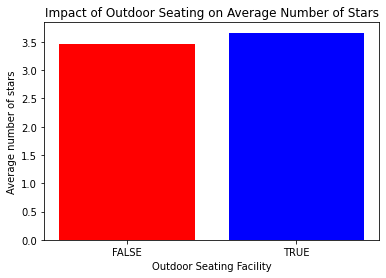

In [66]:
alldata = yelp_train.append(yelp_test)
alldata_mod = alldata[alldata['OutdoorSeating'] != '(Missing)']
df_outdoor = pd.DataFrame(alldata_mod.groupby('OutdoorSeating')['stars'].mean().reset_index())
plt.bar(df_outdoor['OutdoorSeating'],df_outdoor['stars'],color = ['red','blue'])
plt.xlabel('Outdoor Seating Facility')
plt.ylabel('Average number of stars')
plt.title('Impact of Outdoor Seating on Average Number of Stars')
df_outdoor

Tip 2.


We are able to get importance score of each features from Random Forest Model produced above.
By looking at the importance score related tables visialized below, I would advise to have many Review writing related promotions to increase review counts, which could potentially lead to increase in star ratings, since review_count feature has the significantly highest importnace score of 19.3.

In [67]:
#Importance Score for each Features.
pd.DataFrame({'Feature' : x_train_enc2.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,review_count,19.3
1,GoodForKids_(Missing),1.6
2,GoodForKids_FALSE,1.0
3,GoodForKids_TRUE,2.1
4,Alcohol_'beer_and_wine',1.1
5,Alcohol_'full_bar',1.9
6,Alcohol_'none',2.0
7,Alcohol_(Missing),1.1
8,BusinessAcceptsCreditCards_(Missing),0.3
9,BusinessAcceptsCreditCards_FALSE,1.1


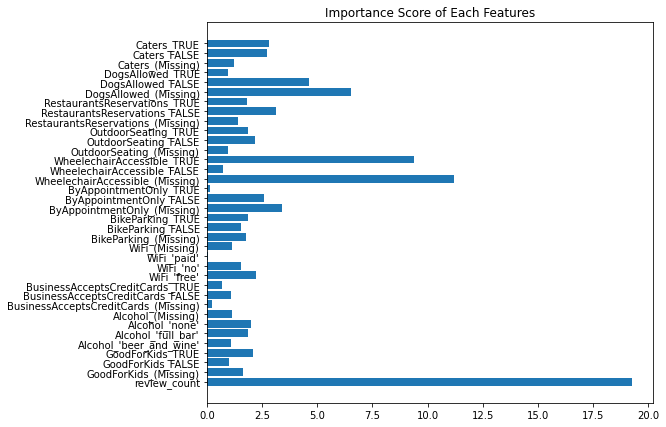

In [68]:
#Visualization of Importance Score.
plt.figure(figsize=(8,7))
plt.barh(x_train_enc2.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.title('Importance Score of Each Features')
plt.show()

Tip 3.

I made a visualization by finding the average star rating of businesses that offers free WiFi(3.673103) and average star rating of businesses that offers paid WiFi (3.209877), and average star rating of businesses that does not offer WiFi (3.465602). We can observe that providing Paid WiFi had the lowest average star rating, which is even lower that the average star rating of  businesses that does not offer WiFi. Obviously, offering Free WiFi had the highest average star ratings. Therefore, I would recommend businesses to NOT offer paid WiFi, and offering Free WiFi is the best option since the average star rating among them differs by about 0.47.

,WiFi,stars
0,'free',3.673103
1,'no',3.465602
2,'paid',3.209877


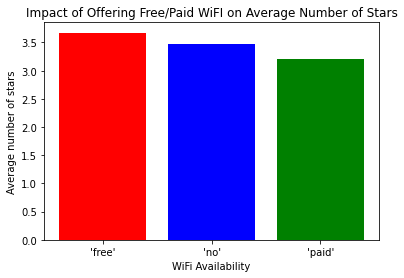

In [69]:
alldata_mod2 = alldata[alldata['WiFi'] != '(Missing)']
df_WiFi = pd.DataFrame(alldata_mod2.groupby('WiFi')['stars'].mean().reset_index())
plt.bar(df_WiFi['WiFi'],df_WiFi['stars'],color = ['red','blue','green'])
plt.xlabel('WiFi Availability')
plt.ylabel('Average number of stars')
plt.title('Impact of Offering Free/Paid WiFI on Average Number of Stars')
df_WiFi